# Functional model

In [62]:
# Simulations study parameters
FMIN = 6 #minimum possible visual score
SMIN = 0 #minimum possible symptom score
NDAYS = 160 #number of days in the study
FIRSTVISIT = 8
LASTVISIT = NDAYS-1
#TODO: seeding for random functions
#TODO: add warnings for things that shouldn't happen, e.g. symptoms lower than SMIN
#TODO: plotting methods and printing methods
#TODO: model class (for FMMIN, popsize, symptomfunctiontype, etc.)
#TODO: study class (for NDAYS, FIRSTVISIT, filterpop, etc.)

In [70]:
class Population:
    def __init__(self, size=10000, symptomfunctiontype='linear', errortype='multiplicative'):
        self.symptomfunctiontype = symptomfunctiontype
        self.errortype = errortype
        self.persons = [Person(self) for i in range(size)]
    def size(self):
        return len(self.persons)
        
    #functions to sample parameters for each person
    #TODO: should these be passed in __init__() ?
    def gen_r():
        return 1
    def gen_f0():
        return 16
    def gen_a():
        return 1
    def gen_B():
        return 1.5
    def gen_C(self):
        if self.errortype=='multiplicative':
            return 1
        elif self.errortype=='additive':
            return 0

    def filterPop(self):
        def isTypicalRecovery(person):
            if (min(person.symptomscores[:FIRSTVISIT] <= SMIN)): #if at some point before first visit symptoms go to 'recovered'
                return False #person cancels the appointment
            elif (min(person.symptomscores) > SMIN): #if symptoms never go to 'recovered'
                return False #excluded from study because considered 'chronic'
            else:
                return True #typical patient
        filteredPop = Population(0)
        filteredPop.persons = filter(isTypicalRecovery, self.persons)
        return filteredPop

In [71]:
class Person:
    def __init__(self, population):
        self.population = population
        self.r = Population.gen_r()
        self.f0 = Population.gen_f0()
        self.a = Population.gen_a()
        self.B = Population.gen_B()
        self.visualscores = [self.visualscore(i) for i in range(NDAYS)]
        self.symptomscores = [self.symptomscore(f) for f in self.visualscores] #TODO: make function and error types a property of population?
        
    def visualscore(self, t):
        #t is a non-negative integer for 'time in days'
        #TODO: parameters r and f0 can be either a fixed number or a function that samples a probability distribution
        return max(-self.r*t+self.f0, FMIN)
    
    def symptomscore(self, f):
        #f is a 'visual score'
        #functiontype is either 'linear' or 'exponential'
        functiontype = self.population.symptomfunctiontype
        #errortype is either 'multiplicative' or 'additive'
        errortype = self.population.errortype
        
        if functiontype=='linear':
            symptoms_noerror = self.a*(f-6)
        elif functiontype=='exponential':
            symptoms_noerror = self.a*(self.f0-6)*(self.B**f-self.B**FMIN)/(self.B**self.f0-self.B**FMIN)
            
        if errortype=='multiplicative':
            return self.population.gen_C()*symptoms_noerror
        elif errortype=='additive':
            return max(self.population.gen_C()*symptoms_noerror, SMIN)

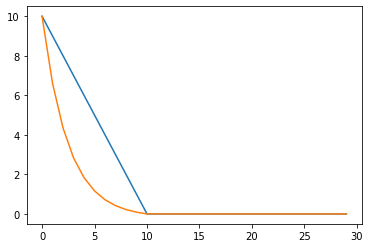

In [75]:
import matplotlib.pyplot as plt

linpop = Population(1, symptomfunctiontype='linear')
exppop = Population(1, symptomfunctiontype='exponential')

fig = plt.figure()
ax = fig.add_subplot(111)
days = 30
ax.plot(range(days), linpop.persons[0].symptomscores[:days])
ax.plot(range(days), exppop.persons[0].symptomscores[:days])
plt.show()